In [1]:
import cv2
import sys

#jupyterで画像表示するためのライブラリの準備
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
#イメージを指定
image_file = "face1.jpg"

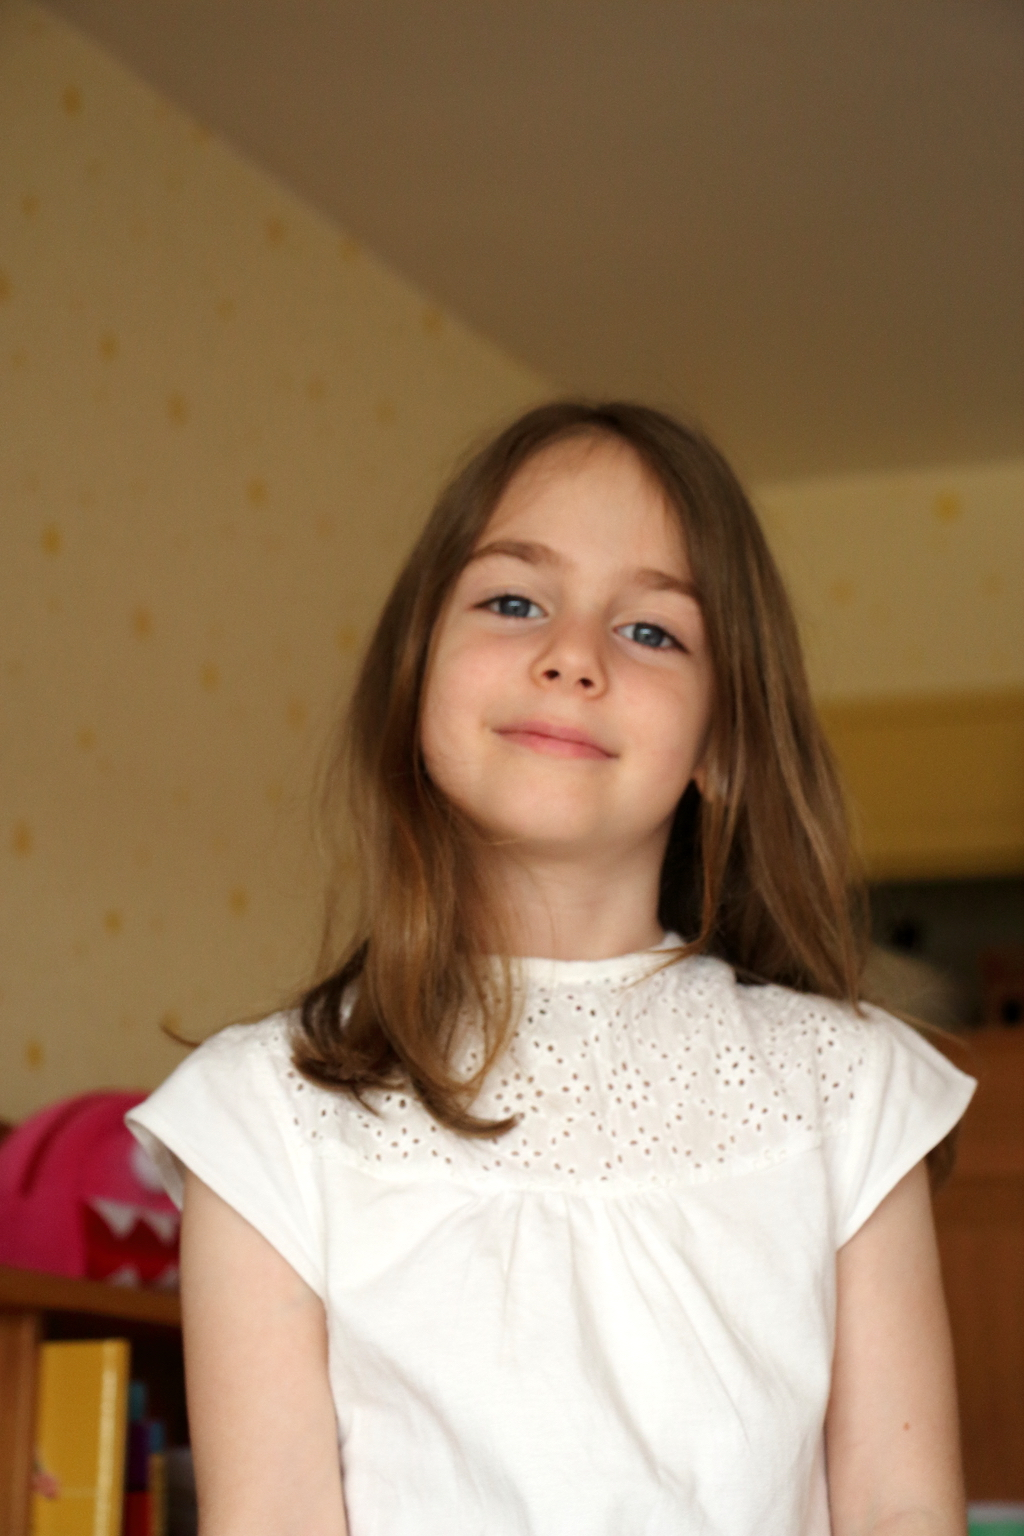

In [3]:
#見てみる
Image(filename =image_file, width=400, height=400)

In [4]:
#カスケードファイルを指定
cascade_file = "haarcascade_frontalface_alt.xml"

In [5]:
#画像の読み込み
image = cv2.imread(image_file)
print(type(image))

<class 'numpy.ndarray'>


In [6]:
#グレースケールに変換
image_gs = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imwrite("grayimage.png",image_gs)

True

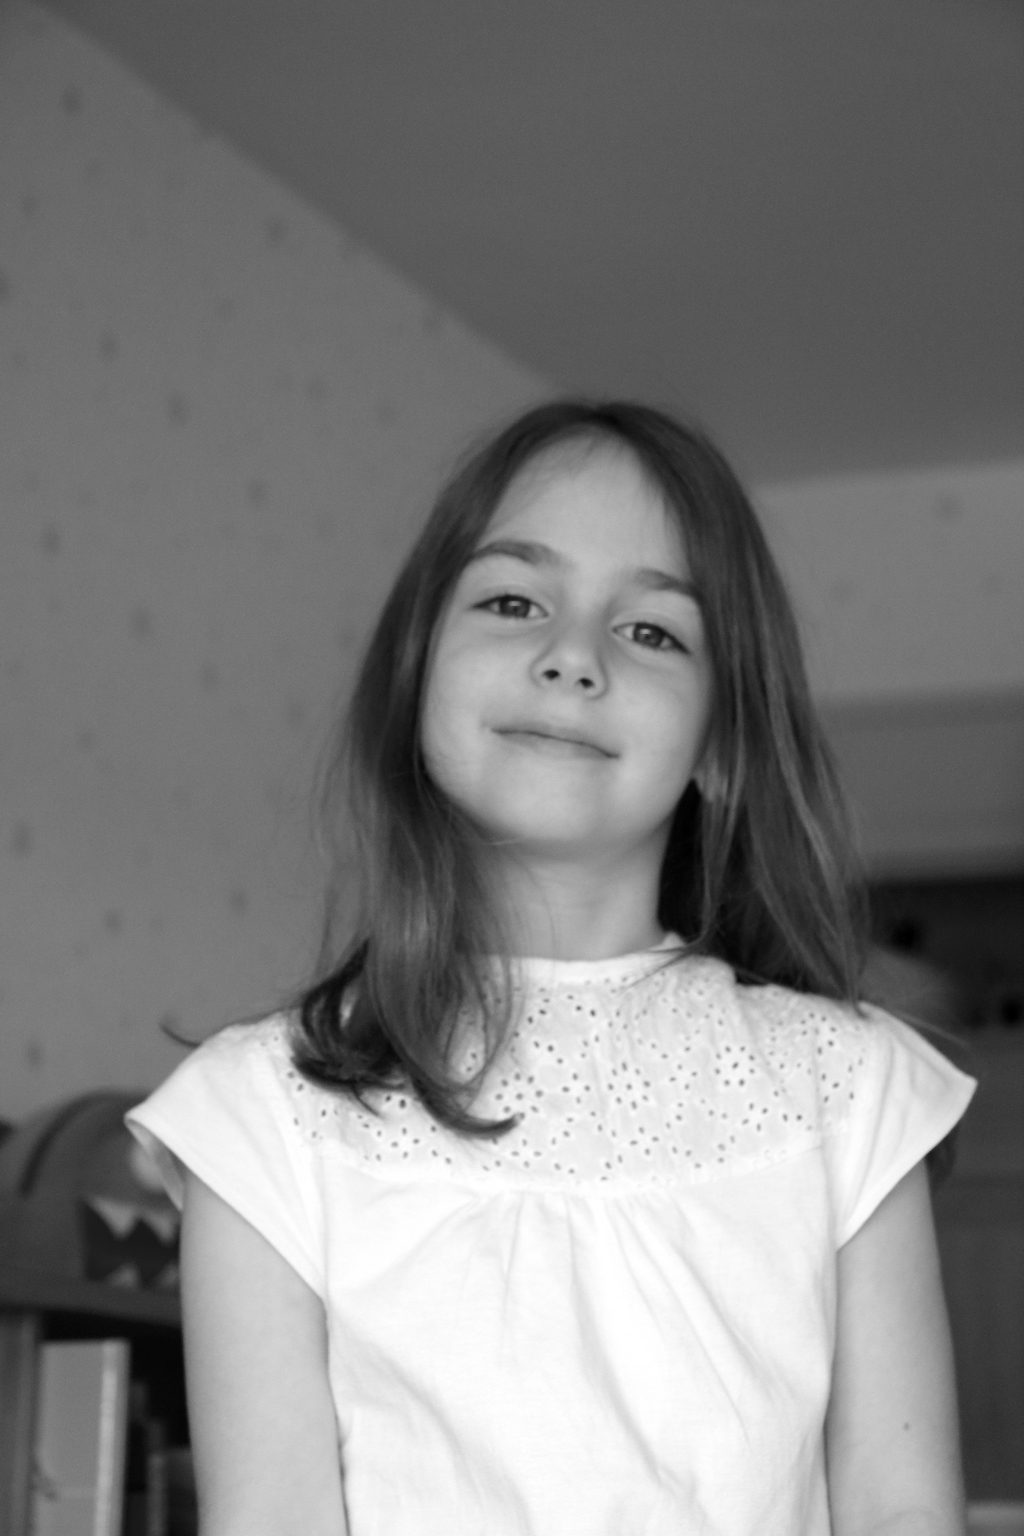

In [7]:
#見てみる
Image(filename ="grayimage.png", width=400, height=400)

In [8]:
#カスケードファイルの読み込み
cascade = cv2.CascadeClassifier(cascade_file)

In [9]:
#顔認識の実行
face_list = cascade.detectMultiScale(image_gs,
    scaleFactor=1.1,
    minNeighbors=1)
# face_list = cascade.detectMultiScale(image_gs,
#     scaleFactor=1.1,
#     minNeighbors=1,
#     minSize=(150,150))

In [10]:
if len(face_list) > 0:
    # 認識した部分を囲む --- (※4)
    print(face_list)
    color = (0, 0, 255)
    for face in face_list:
        x,y,w,h = face
        cv2.rectangle(image, (x,y), (x+w, y+h), color, thickness=8)
    # 描画結果をファイルに書き込む --- (※5)
    cv2.imwrite("facedetect-output.png", image)
#     #顔部分だけ切り出して保存
#     dst = image[y:y+h, x:x+w]
#     cv2.imwrite("cut.png",dst)
else:
    print("no face")

[[402 479 354 354]]


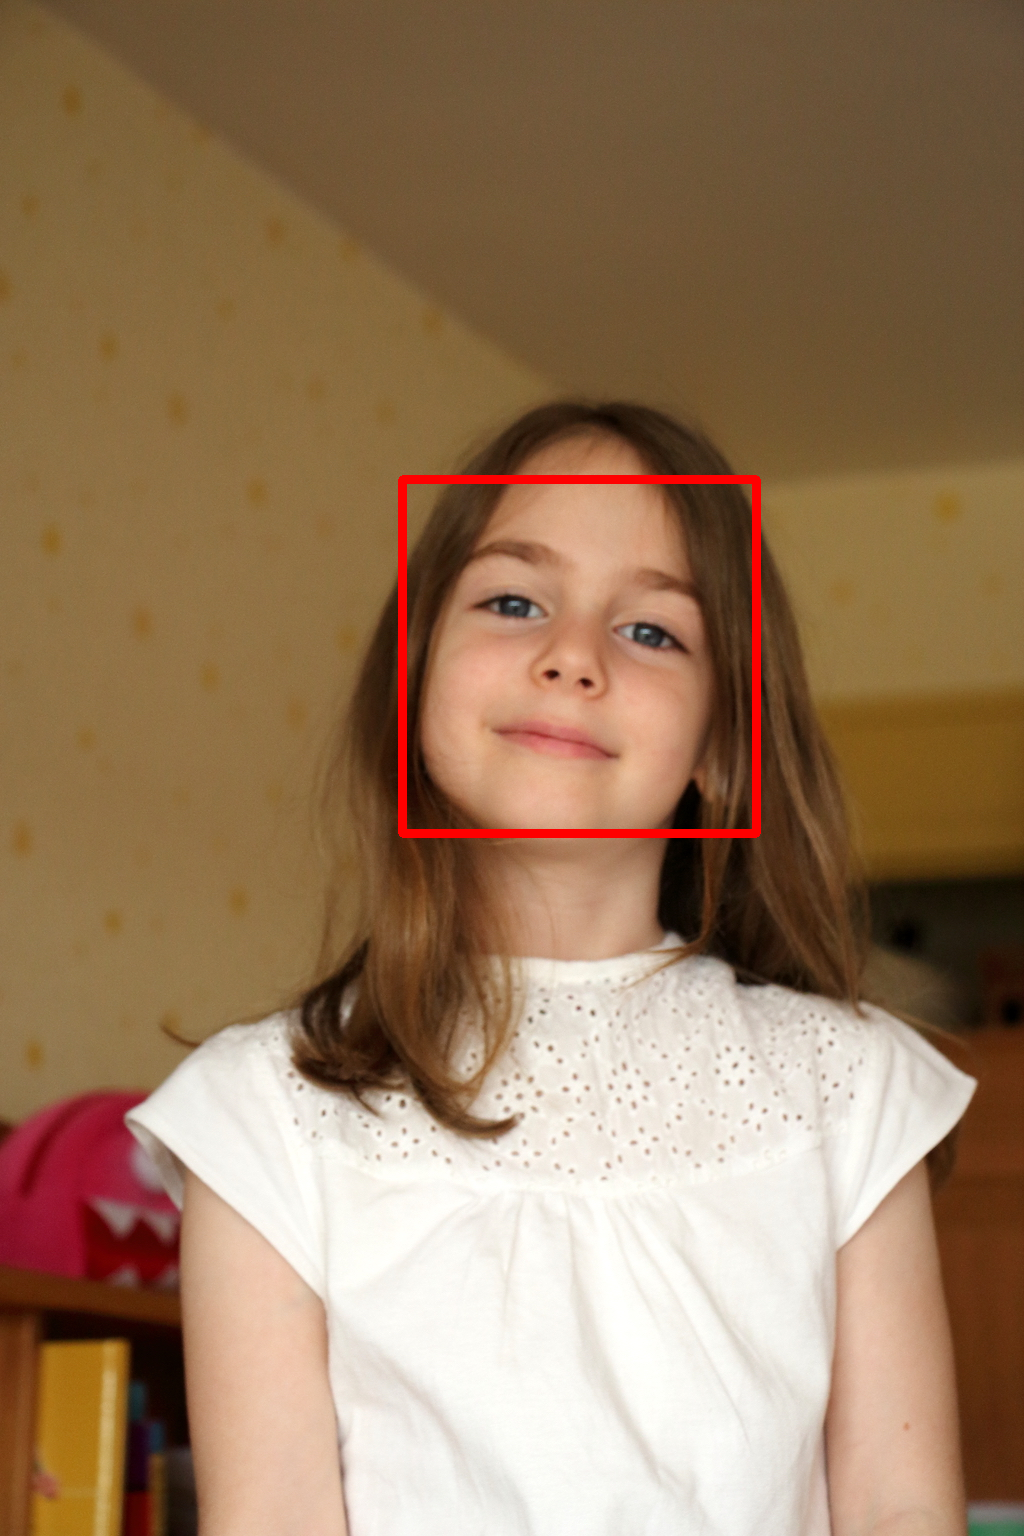

In [11]:
 #見てみる(顔部分を描画)
Image(filename ="facedetect-output.png", width=400, height=400)

In [12]:
#見てみる(顔部分だけ)
#Image(filename ="cut.png", width=400, height=400)